
<a href="https://colab.research.google.com/github/hernansalinas/Curso_aprendizaje_estadistico/blob/main/Sesiones/Sesion_01a_pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regresión Logística

Si deseamos clasificar algún tipo de imagen, resultado en campos medicos, astrofisicos se pueden aplicar algoritmos de clasificación. En particular en esta sesión se estudia los principios basicos de  regresión logística para aplicarla a los  modelos de clasificación.

Supongamos que queremos clasificar dos tipos, basado en dos características:



In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification,make_circles
import numpy as np

Text(0, 0.5, 'X_2')

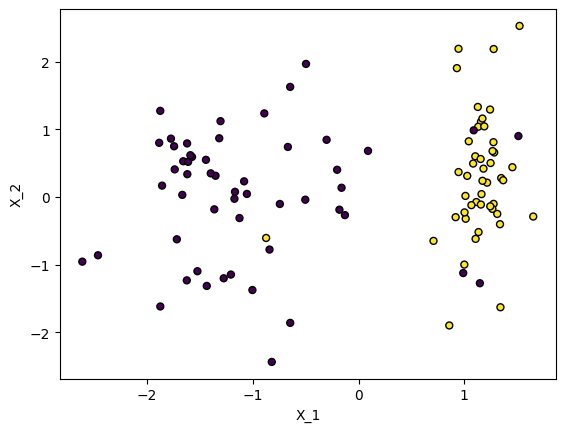

In [2]:
X1, Y1 = make_classification(
    n_features = 2, n_redundant = 0, n_informative=1, n_clusters_per_class=1,
    random_state = 1, class_sep=1.2, flip_y = 0.15)
plt.figure()
plt.scatter(X1[:, 0], X1[:, 1], marker="o", c=Y1, s=25, edgecolor="k")
plt.xlabel("X_1")
plt.ylabel("X_2")

En este caso cada color representa los objetos tipos 0 y tipo 1. Para aplicar un algoritmo de clasificación relacionaremos el valor $h_{\theta}(X^{i})$ con la probabilidad de obtener un valor de y dado un x parametrizado por $\theta$, $P(y|x;\theta)$, asi :

 $h_{\theta}(X^{i}) = P(y|x;\theta) $

 Se cumple que:  $P(y=1|x;\theta)+P(y=0|x;\theta) = 1$

Si tenemos muestra equiprobables, podemos definir lo siguiente  para P :

- $P<0.5$ se obtienen los objetos tipo 0
- $P \geq 0.5$ se obtienen los objetos tipo 1

Podemos establecer un clasificador de lods  sistemas basado en las probabilidades a partir de un clasificador logístico:


\begin{equation}
f(z)=\frac{1}{(1+e^{-z})}
\end{equation}
Cuya derivada es :

\begin{equation}
f'(z)=f(z)(1-f(z))
\end{equation}



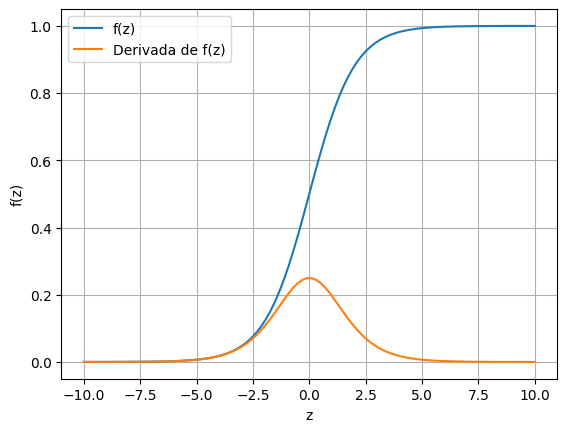

In [3]:
f = lambda x: 1/(1+np.exp(-x))
fp = lambda x: f(x)*(1-f(x))
z=np.linspace(-10, 10, 100)

plt.figure()
plt.plot(z,f(z), label="f(z)")
plt.plot(z,fp(z), label="Derivada de f(z)")
plt.ylabel("f(z)")
plt.xlabel("z")
plt.grid()
plt.legend()

- Para valores de $z< 0.0$ la regresión logistica clasica objetos tipo 0, siendo $f(z)<0.5$
- Para valores de $z\geq 0.0$ la regresión logística clasica objetos tipo 1 siendo $f(z) \geq  0.5$

¿Cual es la probabilidad de que dado un hyperplano, los valores de un hyperlado sean objetos tipo 0 o tipo 1?

Aplicando la regresión logistica, a las regresiones multivariadas estudiadas en la sesiones anteriores, tenemos que el argumento $z=\Theta^{T} X$, así:


\begin{equation}
h_{\theta}(X)=\frac{1}{(1+e^{-\Theta^T X})}
\end{equation}


- Se cumple que para los valores del hyperplano  $\Theta^T X\geq 0.0$, $y = 1$
- Se cumple que para  $\Theta^T X < 0.0$ , $y = 0$


Las condiciones anteriores permiten definir fronteras de desicion entre los datos a clasificar. Para los datos dados arriba, se puede establecer el siguiente clasificador.


$h_\theta(x) = g(\theta_0+\theta_1 x_1+\theta_2 x_2 ) $.

Una clasificación del dataset nos sugiere que la frontera para este dataset es:

$\theta_0+\theta_1 x_1+\theta_2 x_2 \geq 0.0$

Si por algun metodo encontramos que los parametros $\Theta$ entonces podemos definir la frontera de clasifiación. Como ejemplo supongamos que encontramos los siguientes parametros $\Theta=[3.0, -20, 1.0]$

Ecnontrar la ecuacion de la recta y mejorar la parametrizacion

$3-20x1+x2=0$

$x_2= 20 x_1 - 3$

In [4]:
x1 = np.linspace(0, 0.29, 100)
x2 = 20*x1-3

Text(0, 0.5, 'X_2')

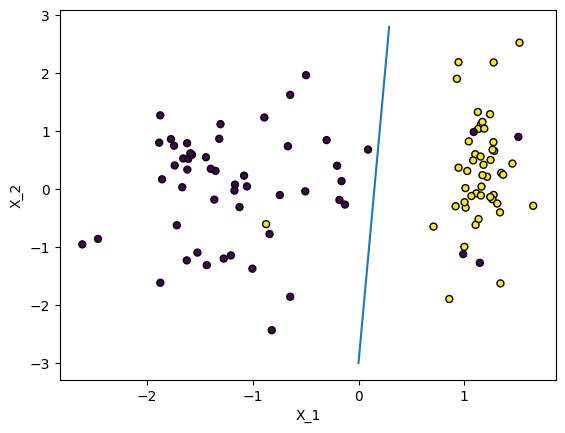

In [5]:
X1, Y1 = make_classification(
    n_features = 2, n_redundant = 0, n_informative=1, n_clusters_per_class=1,
    random_state = 1, class_sep=1.2, flip_y = 0.15)
plt.figure()
plt.scatter(X1[:, 0], X1[:, 1], marker="o", c=Y1, s=25, edgecolor="k")
plt.plot(x1, x2)
plt.xlabel("X_1")
plt.ylabel("X_2")

Fronteras no lineal también puede ser consideradas, para ello se puede definir  $\Theta^T X$ como funcion de un polinomio, por ejemplo

$\Theta^T X =  \theta_0 + \theta_1 x_1 + \theta_2 x_2 + \theta_3 x_1^2 +\theta_4 x_1^4$

\begin{equation}
h_\theta(X) =  \frac{1}{1+e^{\theta_0 + \theta_1 x_1 + \theta_2 x_2 + \theta_3 x_1^2 +\theta_4 x_1^4}}
\end{equation}

La frontera de desición en este caso esta determinada por:

$\theta_0 + \theta_1 x_1 + \theta_2 x_2 + \theta_3 x_1^2 +\theta_4 x_1^4 \geq 0$
para obtener un clasificador con valores de y = 1.

Para este mismo caso, supongamos que tenmos la siguiente distribución de datos, ¿Cuál es el mejor elección de parámetros $\Theta$ que permite clasificar los datos siguientes:







(-1.12244940477901, 1.1839643638442499, -1.2696420440360447, 1.185918477713659)

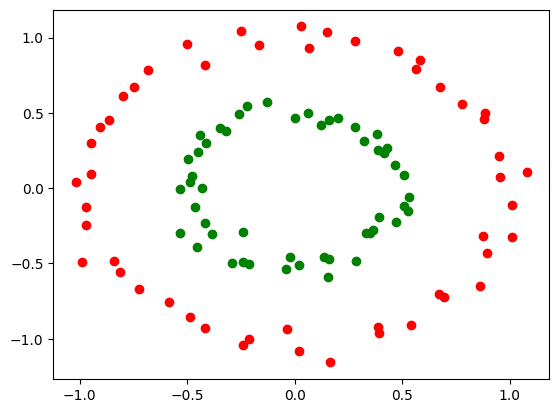

In [6]:
X, y = make_circles(
    n_samples=100, factor=0.5, noise=0.05, random_state=0)
red = y == 0
green = y == 1
f, ax = plt.subplots()
ax.scatter(X[red, 0], X[red, 1], c="r")
ax.scatter(X[green, 0], X[green, 1], c="g")
plt.axis("tight")

Analizando el conjunto de datos, se puede observar que la frontera es la de una circunferencia con centro en (0, 0) y radio de 0.7 aproxidamente,  asi nuestra elección de parámetros para el polinomio ejemplicado en la celda anterior ($\theta_0 + \theta_1 x_1 + \theta_2 x_2 + \theta_3 x_1^2 +\theta_4 x_1^4 \geq 0$ ) es:


$\Theta^T = [0.7,0, 0, 1,1 ] $

Reemplando tenemos que:

$-0.7+x_1^2+x_2^2 \geq 0$

$x_1^2+x_2^2 \geq 0.7$

Text(0, 0.5, 'X_2')

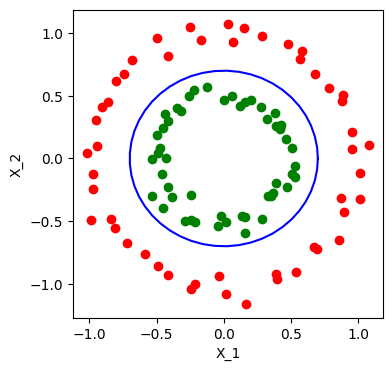

In [7]:
#Por motivos graficos convirtamos la ecuación anterior parametrizada
#por theta

alpha = np.linspace(0, 2*np.pi)
x1=0.7*np.cos(alpha)
x2=0.7*np.sin(alpha)

X, y = make_circles(
    n_samples=100, factor=0.5, noise=0.05, random_state=0)
red = y == 0
green = y == 1

f, ax = plt.subplots(figsize=(4,4))
ax.scatter(X[red, 0], X[red, 1], c="r")
ax.scatter(X[green, 0], X[green, 1], c="g")

plt.plot(x1, x2,"b-")
plt.axis("tight")
plt.xlabel("X_1")
plt.ylabel("X_2")

De forma general, ¿Cómo pueden ser elegidos los valores de $\Theta$?.



Para todo el conjunto de datos, tenemos que:

Sea $\Theta^T = [\theta_0,\theta_1,\theta_2,...,\theta_n]$ una matrix $1 \times (n+1)$ y  


\begin{equation}
X =
\begin{bmatrix}
1& 1 & 1 & .&.&.&1\\
x_1^{(1)}&x_1^{(2)} & x_1^{(3)} & .&.&.&x_1^{(m)}\\
.&. & . &.&.&.& .\\
.&. & . & .&.&.&.\\
.&. & . & .&.&.&.\\
x_n^{(1)}&x_n^{(2)} & x_n^{(3)} & .&.&.&x_n^{(m)}\\
\end{bmatrix}_{(n+1) \times m}
\end{equation}


\begin{equation}
h_\theta (x)= \frac{1}{1+e^{\Theta ^T X}}
\end{equation}



Para ello, podemos definir la función de coste como :

$ J (\Theta) =\frac{1}{m} \sum_{i=1}^{m} \left[-y\log (h_{\theta}(X ^ {i})) - (1-y)\log (1-h_{\theta}(X^{i})) \right]$

Esta función de coste permite establecer el mejor clasificadose para la regresión logistica de acuerdo a la teroria de probabilidad. Se garantiza que cuando $P(y=1|x,\theta)$ se cumple la función de coste se minimiza, penalizando los valores que sean iguales a $P(y=0|x,\theta)$, analogamente, se cumple que cuando $P(y=0|x,\theta)$ se cumple la función de coste se minimiza, penalizando los valores que sean iguales a $P(y=1|x,\theta)$.
La metrica empleada para la regresión lineal no es recomedada en este caso, dado que la funcion de coste puede presentar múltiples minimos que dificultan la minimizacion  a través de algunas de las técnicas empleadas. Una justificación adicional para la métrica  es dada mas adelante segun la teoria de la probabilidad.

Se deja como tarea motrar que:

\begin{equation}
\frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m}\sum_{i=1}^{m}[y^{(i)}-h_\theta X^{(i)}] X_j^{(i)}
\end{equation}

Para la demostración, muestre que:
- $f(z)=\frac{1}{1+e^{-z}} = f(z)(1-f(z))$
- $\frac{\partial h_{\theta}}{\partial \theta_j } = h_{\theta}(X^{(i)})(1-h_{\theta}(X^{(i)}))X_j^{(i)}$


La derivada permite aplicar el gradiente descendente para minimizar nuestra función de coste asi,  nuestro algoritmo de minimizacion permite encontrar los valores de $\theta$ despues de un conjunto determinado de itereaciones.

$\theta_j: \theta_j - \alpha \frac{\partial J}{\partial \theta_j}$


Otros metodos de minizacion podrian ser aplicados, tales como:


[Gradiente conjugado ](https://es.wikipedia.org/wiki/M%C3%A9todo_del_gradiente_conjugado#:~:text=En%20matem%C3%A1tica%2C%20el%20m%C3%A9todo%20del,son%20sim%C3%A9tricas%20y%20definidas%20positivas.&text=Varios%20m%C3%A9todos%20del%20gradiente%20conjugado,de%20las%20ecuaciones%20no%20lineales)

[BFGS](https://en.wikipedia.org/wiki/Broyden%E2%80%93Fletcher%E2%80%93Goldfarb%E2%80%93Shanno_algorithm)


[L-BGFS](https://en.wikipedia.org/wiki/Limited-memory_BFGS)

[Newton-Rhapson](https://en.wikipedia.org/wiki/Newton%27s_method)


# Interpretación estadística


¿Qué tan adeacuado es la elección de $J(\theta)$  para el modelo de regresion logistica?



\begin{equation}
P(y=1|x;\theta)= h_{\theta}(X^{(i)})
\end{equation}

\begin{equation}
P(y=0|x;\theta)= 1-h_{\theta}(X^{(i)})
\end{equation}



\begin{equation}
P(y|x;\theta)=[h_{\theta}(X^{(i)})]^{y}[1-h_{\theta}(X^{(i)})]^{1-y}
\end{equation}

Asumiendo que los datos de entrenamiento son independientes:

$\cal{L}(\theta)=p(\vec{y}|x, \theta)$

\begin{equation}
\cal{L}(\theta)=\prod_{i=1}^{m} [h_{\theta}(X^{(i)})]^{y}[1-h_{\theta}(X^{(i)})]^{1-y}
\end{equation}

tomando el logaritmo:


\begin{equation}
\log \cal{L}(\theta)= \sum_{i=1}^{m} y \log h_{\theta}(X^{(i)}) + (1-y)(1-h_{\theta}(X^{(i)}))
\end{equation}

Los datos a considerar son los mas probables es decir que para encontrar los valores de $\theta$ que nos garantizan la maxima probabilidad es necesario maximar la función anterior. Despues de realizar los calculos se puede mostrar la ecuación dada para el gradiente de la función de coste.



En conclusión se cumple que:

Para todo el conjunto de datos, tenemos que:

Sea $\Theta^T = [\theta_0,\theta_1,\theta_2,...,\theta_n]$ una matrix $1 \times (n+1)$ y  


\begin{equation}
X =
\begin{bmatrix}
1& 1 & 1 & .&.&.&1\\
x_1^{(1)}&x_1^{(2)} & x_1^{(3)} & .&.&.&x_1^{(m)}\\
.&. & . &.&.&.& .\\
.&. & . & .&.&.&.\\
.&. & . & .&.&.&.\\
x_n^{(1)}&x_n^{(2)} & x_n^{(3)} & .&.&.&x_n^{(m)}\\
\end{bmatrix}_{(n+1) \times m}
\end{equation}


\begin{equation}
h_\theta (x)= \frac{1}{1+e^{\Theta ^T X}}
\end{equation}



- Función de coste
$ J (\Theta) =\frac{1}{m} \sum_{i=1}^{m} \left[-y\log (h_{\theta}(X ^ {i})) - (1-y)\log (1-h_{\theta}(X^{i})) \right]$

- Derivada de la funcion de coste
\begin{equation}
\frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m}\sum_{i=1}^{m}[y^{(i)}-h_\theta X^{(i)}] X_j^{(i)}
\end{equation}





# Tomar el [iris dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set) desde sklearn:

```
from sklearn import datasets

iris = datasets.load_iris()
```
- Realizar la clasifición de las tres clases  a traves de una regresión logística  y realizar multiclasicación, para ello considere lo siguiente:

Si en un dataset existen más de 2 clases, $y={0, 1, 2, 3, ...}$ se debe construir una multiclasificación, una contra todos, la estrategia sugerida es la siguiente.

Sea A, B, C las tres clases. Para estos valores definir:

1. Definir la clase A como la clase 0 y todas las otras B, C como la clase 1
2. Encontrar el valor $h_\theta(X) = P(y=A|x;\theta)$
3. Definir la clase B como la clase 0 y todas las otras A, C como la clase 1
4. Encontrar el valor $h_\theta(X) = P(y=B|x;\theta)$
5. Definir la clase C como la clase 0 y todas las otras A, B como la clase 1
6. Encontrar el valor $h_\theta(X) = P(y=C|x;\theta)$




In [8]:
from sklearn import datasets
from sklearn.model_selection import StratifiedShuffleSplit
import pandas as pd
from sklearn.linear_model import LogisticRegression
import matplotlib.pylab as plt



In [9]:
iris = datasets.load_iris()
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [10]:
print(iris.DESCR)


.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [11]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [12]:
X = iris["data"]
Y = iris["target"]

In [13]:
names_features = iris["feature_names"]
names_target = iris["feature_names"]
df = pd.DataFrame(X, columns=names_features)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [14]:
columns_name =[ "".join([c.capitalize() for c in cols.split()])  for cols in df.columns ]
columns_name =[col.replace("(" ,"_") for col in columns_name ]
cols= [col.replace(")" ,"") for col in columns_name ]

In [15]:
df.columns=cols
df["Target"]=Y

In [16]:
df

,SepalLength_cm,SepalWidth_cm,PetalLength_cm,PetalWidth_cm,Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [17]:
split = StratifiedShuffleSplit(n_splits = 1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(df, df["Target"]):
  strat_train_set = df.loc[train_index]
  strat_test_set = df.loc[test_index]

In [18]:
df_train = strat_train_set
df_test = strat_test_set


#Clasificación tipo 1: setosa

In [19]:
#Seleccion de valores de y
# Tomemos solo una caractgeristicas por motivos didacticos
y_train = (df_train['Target'] == 0).astype(float) # forma rapida, se puede one hot enconder
X_train = df_train.iloc[:,0:1].values

y_test = (df_test['Target'] == 0).astype(float)
X_test = df_test.iloc[:,0:1].values

In [20]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [21]:
print(log_reg.score(X_train,y_train))
print(log_reg.score(X_test,y_test))

0.9166666666666666
0.8


In [22]:
# Determinacion de la frontera
X_new = np.linspace(-10, 10, 1000).reshape(-1, 1)#Generamos los valores de X_new
prob = log_reg.predict_proba(X_new)

In [23]:
prob

array([[0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00],
       ...,
       [9.99999932e-01, 6.78835346e-08],
       [9.99999937e-01, 6.31876491e-08],
       [9.99999941e-01, 5.88166044e-08]])

In [24]:
decision_boundary = X_new[prob[:, 0] >= 0.5][0]
decision_boundary

array([5.35535536])

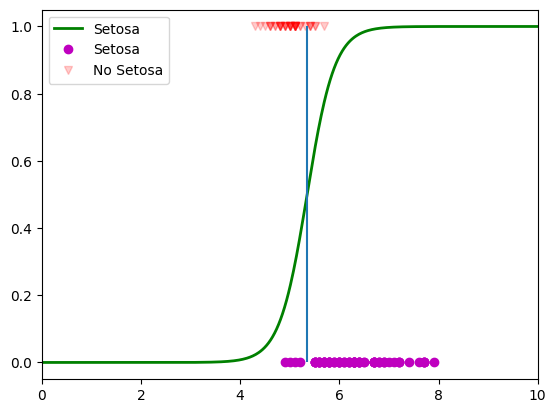

In [25]:
plt.figure()
#Regresion Logistica
plt.plot(X_new, prob[:, 0], "g-", linewidth=2, label="Setosa")
# Forntera de desicion
plt.plot(X_train[y_train==0], y_train[y_train==0],"mo",label = "Setosa")
plt.plot(X_train[y_train==1], y_train[y_train==1],"rv",alpha=0.2,label="No Setosa")
plt.xlim(0.0,10)
plt.legend()
plt.vlines(decision_boundary, 0,1)
plt.show()

# Tarea 8.1

¿Entrenar con más caracteristicas y con base a las probabilidades y dado un input  definir a  que clase pertenece: 'versicolor', 'virginica' ?

Por ejemplo dado X = [4.9,5.0, 1.8, 0.3] asociados a todas las caracteristicas, ¿cuál es la probabilidad de que la flor sea setosa, versicolor o virginica?




In [34]:
X_train = df_train.iloc[:, :-1].values
X_test = df_test.iloc[:, :-1].values

#Definicion de las tres clases
y_train_setosa = (df_train['Target'] == 0).astype(float)
y_train_versicolor = (df_train['Target'] == 1).astype(float)
y_train_virginica = (df_train['Target'] == 2).astype(float)

#Entrenamiento del modelo de regresion logistica para cada clase
log_reg_setosa = LogisticRegression()
log_reg_versicolor = LogisticRegression()
log_reg_virginica = LogisticRegression()

log_reg_setosa.fit(X_train, y_train_setosa)
log_reg_versicolor.fit(X_train, y_train_versicolor)
log_reg_virginica.fit(X_train, y_train_virginica)

X_new = [4.9, 5.0, 1.8, 0.3]

#Calculo de las Probabilidades
prob_setosa = log_reg_setosa.predict_proba([X_new])[0,1]
prob_versicolor = log_reg_versicolor.predict_proba([X_new])[0,1]
prob_virginica = log_reg_virginica.predict_proba([X_new])[0,1]

print(f"Probabilidad de Setosa: {prob_setosa:.5f}")
print(f"Probabilidad de Versicolor: {prob_versicolor:.5f}")
print(f"Probabilidad de Virginica: {prob_virginica:.5f}")

# Determinar la clase con la mayor probabilidad
probabilities = {'Setosa': prob_setosa, 'Versicolor': prob_versicolor, 'Virginica': prob_virginica}
predicted_class = max(probabilities, key=probabilities.get)

print(f"La flor es probablemente: {predicted_class}")

Probabilidad de Setosa: 0.98644
Probabilidad de Versicolor: 0.00775
Probabilidad de Virginica: 0.00001
La flor es probablemente: Setosa


# SOFTMAX REGRESION

La elección anterior es conocida com softmax regresión, que permite definir un conjunto de probabilidades asociadas a un conjunto de clases. Al definir el maximo valor de la probabilidad dado un conjunto de inputs se tiene el objeto que predice el modelo, una forma de hacer una implementación rapida es mostrada a continuación.

In [35]:
# Para todas las clases se puede realizar facilmente a traves de
# lo siguiente

y_train = df_train['Target']
X_train = df_train.iloc[:,0:1].values

y_test = df_test['Target']
X_test = df_test.iloc[:,0:1].values

In [36]:
softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", \
                                 C=10, random_state=42)
softmax_reg.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(C=10, multi_class='multinomial', random_state=42)

In [43]:
X_new = np.linspace(0, 10, 1).reshape(-1,1)
softmax_reg.predict_proba(X_new)
#Probabilidad de pertencer a la clase cero

array([[1.00000000e+00, 8.05800456e-14, 4.46297192e-19]])

# Tarea 8.2

1. Entrenar el modelo anterior para un numero mayor de caracteristicas
2. Analizar que pasa con la regularaización.
3. Hacer una analisis de las metricas, construir curvas de aprendizaje para todo el conjunto de datos
4. Con base en el libro [Hand on Machine learning](https://github.com/ageron/handson-ml/blob/master/04_training_linear_models.ipynb), constrnuir las fronteras de desición para este multiclasificador.

Santiago Andres Orjuela Montealegre

1006508118

Entrenamoento para un mayor numero de caracteristicas

In [54]:
X_train = df_train.iloc[:, :-1].values
y_train = df_train['Target']

softmax_reg = LogisticRegression(solver="lbfgs", \
                                 C=10, random_state=42, max_iter=1000)
softmax_reg.fit(X_train, y_train)

LogisticRegression(C=10, max_iter=1000, random_state=42)

Regularización

In [55]:
cs = [0.001, 0.01, 0.1, 1, 10, 100]
for c in cs:
  softmax_reg = LogisticRegression(solver="lbfgs", \
                                 C=c, random_state=42, max_iter=1000)
  softmax_reg.fit(X_train, y_train)
  score = softmax_reg.score(X_train, y_train)
  print(f"C: {c}, Score: {score}")

C: 0.001, Score: 0.7416666666666667
C: 0.01, Score: 0.8916666666666667
C: 0.1, Score: 0.9583333333333334
C: 1, Score: 0.975
C: 10, Score: 0.975
C: 100, Score: 0.9833333333333333


Analisis de las metricas y construcción de las curvas de aprendizaje

In [57]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

In [59]:
X_test = df_test.iloc[:, :-1].values
y_test = df_test['Target']

y_pred = softmax_reg.predict(X_test)
print("Reporte de clasificación:\n", classification_report(y_test, y_pred))
print("Precisión:", accuracy_score(y_test, y_pred))

Reporte de clasificación:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Precisión: 1.0


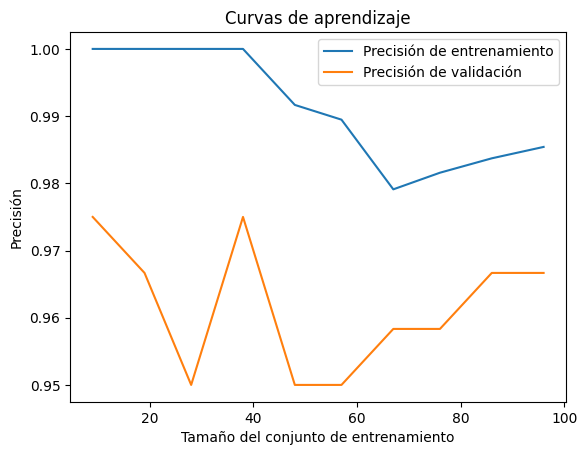

In [62]:
train_sizes, train_scores, test_scores = learning_curve(softmax_reg, X_train, y_train, cv=5, train_sizes=np.linspace(0.1, 1, 10))

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_scores_mean, label="Precisión de entrenamiento")
plt.plot(train_sizes, test_scores_mean, label="Precisión de validación")
plt.xlabel("Tamaño del conjunto de entrenamiento")
plt.ylabel("Precisión")
plt.legend()
plt.title("Curvas de aprendizaje")
plt.show()

Fronteras de Desición

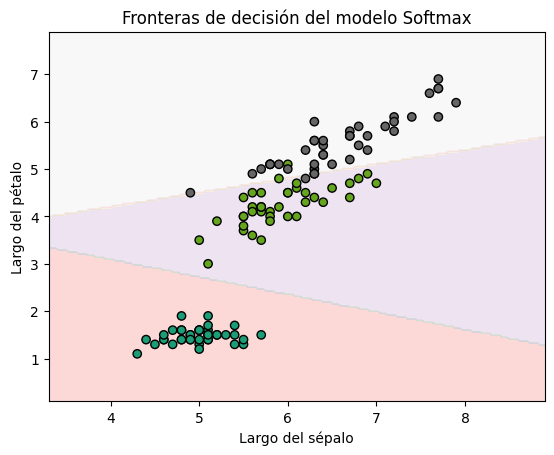

In [66]:
X_train_2d = df_train.iloc[:, [0, 2]].values
y_train_2d = df_train['Target']

softmax_reg_2d = LogisticRegression(solver="lbfgs", C=10, random_state=42)
softmax_reg_2d.fit(X_train_2d, y_train_2d)

x0, x1 = np.meshgrid(
    np.linspace(X_train_2d[:, 0].min() - 1, X_train_2d[:, 0].max() + 1, 200),
    np.linspace(X_train_2d[:, 1].min() - 1, X_train_2d[:, 1].max() + 1, 200)
)
X_new = np.c_[x0.ravel(), x1.ravel()]
y_predict = softmax_reg_2d.predict(X_new).reshape(x0.shape)

plt.contourf(x0, x1, y_predict, cmap="Pastel1", alpha=0.5)
plt.scatter(X_train_2d[:, 0], X_train_2d[:, 1], c=y_train_2d, cmap="Dark2", edgecolor="k")
plt.xlabel("Largo del sépalo")
plt.ylabel("Largo del pétalo")
plt.title("Fronteras de decisión del modelo Softmax")
plt.show()


Referencias

[1] http://cs229.stanford.edu/syllabus.html

[2] https://www.coursera.org/learn/machine-learning. Week 3.

[3] https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html#sphx-glr-auto-examples-classification-plot-classifier-comparison-py


[4]https://scikit-learn.org/stable/datasets/toy_dataset.html